# Import Libraries

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings

warnings.filterwarnings(action = 'ignore')

# Load dataset

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# shape
print("Shape: ",dataset.shape,"\n")

# head
print("First records of data:\n ",dataset.head(),"\n")

# class distribution
print(dataset.groupby('class').size())

Shape:  (150, 5) 

First records of data:
     sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Descriptions

In [4]:
print("Statistical description of data:\n",dataset.describe())

Statistical description of data:
        sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# Box and Whisker plots

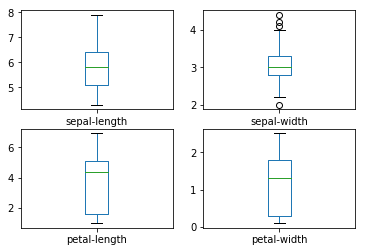

In [5]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# Histograms

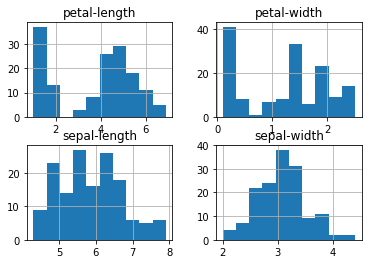

In [6]:
dataset.hist()
plt.show()

# Scatter plot matrix

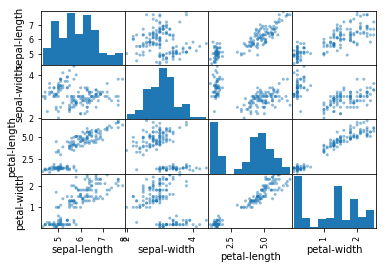

In [7]:
scatter_matrix(dataset)
plt.show()

# Scatter plots of Sepal and Petal Features

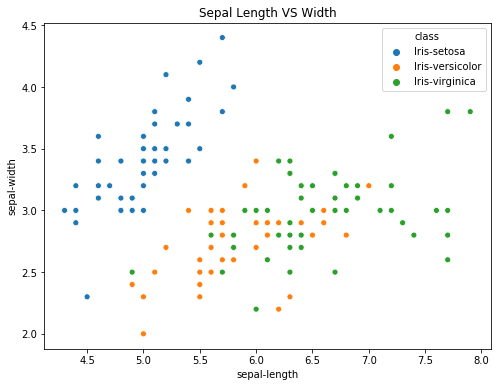

In [8]:
plt.figure(figsize=(8,6))
plt.title("Sepal Length VS Width")

sns.scatterplot('sepal-length','sepal-width', data=dataset, hue='class')


We see a clear distinction between Iris-setosa and the other species. However, we see that Iris-versicolor and Iris-virginica have some overlap.

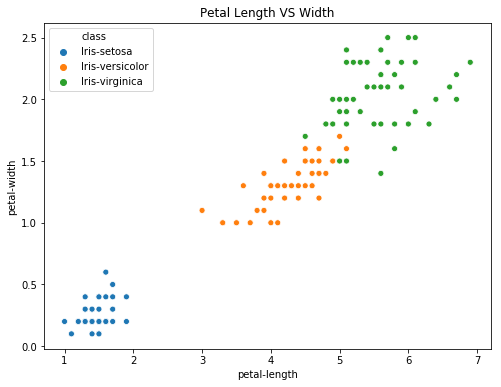

In [9]:
plt.figure(figsize=(8,6))
plt.title("Petal Length VS Width")

sns.scatterplot('petal-length','petal-width', data=dataset, hue='class')

There seems to be three distinct groups. We could use an unsupervised learning algorithm (eg. PCA, K-means) tpo derive some information from this.

# Feature Engineering

In [10]:
dataset['length_div_width'] = (dataset['petal-length'] / dataset['petal-width'])
dataset['length_div_width'].head(10)

0     7.000000
1     7.000000
2     6.500000
3     7.500000
4     7.000000
5     4.250000
6     4.666667
7     7.500000
8     7.000000
9    15.000000
Name: length_div_width, dtype: float64

# Split-out validation dataset

In [11]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

# Create Model Shells (Instantiate them)

In [12]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB', xgb.XGBClassifier()))

# Spot test each model with Cross-Validation

In [13]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
RF: 0.950000 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)
XGB: 0.975000 (0.038188)


# Graphical comparison of algorithms

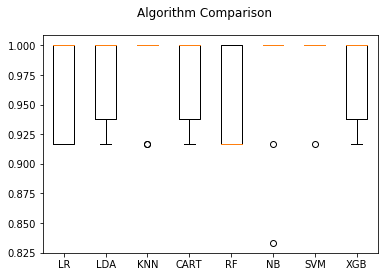

In [14]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Make predictions on validation dataset
K-Nearest Neighbors:

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



SVM - Support Vector Machine:

In [16]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

      micro avg       0.93      0.93      0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



# Tuning Hyperparameters for XGBoost

Parameters to tune:

1) learning_rate

2) max_depth

3) min_child_weight

4) gamma

In [17]:
def train_vs_test_plot(clf_list, param):
    # store results
    results_train = []
    results_test = []
    for clf in clf_list:
        clf.fit(X_train, Y_train)
        Y_pred_train = clf.predict(X_train)
        Y_pred_validation = clf.predict(X_validation)
        score_train = accuracy_score(Y_train, Y_pred_train)
        score_test = accuracy_score(Y_validation, Y_pred_validation)
        # store as tuple for convenient access
        results_train.append((getattr(clf, param), score_train))
        results_test.append((getattr(clf, param), score_test))
     
    plt.plot([tup[0] for tup in results_train], [tup[1] for tup in results_train], label='Train Set')
    plt.plot([tup[0] for tup in results_test], [tup[1] for tup in results_test],  label='Validation Set')
    plt.xlabel('{}'.format(param))
    plt.ylabel('Accuracy')
    plt.title('Train VS Validation Scores')
    plt.legend(loc="lower right")
    plt.show()

    max_train = max(results_train,key=lambda item:item[1])
    max_test = max(results_test,key=lambda item:item[1])

    # get max precision
    print('Highest Accuracy (Train): {} ({} = {})'.format(max_train[1], param, max_train[0]))
    print('Highest Accuracy (Test): {} ({} = {})'.format(max_test[1], param, max_test[0]))

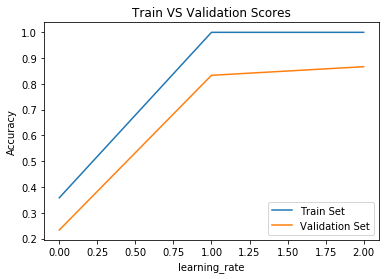

Highest Accuracy (Train): 1.0 (learning_rate = 1)
Highest Accuracy (Test): 0.8666666666666667 (learning_rate = 2)


In [18]:
learning_rates = [int(x) for x in np.linspace(start = 0, stop = 2, num = 10)]
clf_list = []
for rate in learning_rates:
    clf = xgb.XGBClassifier(learning_rate = rate)
    clf_list.append(clf)

train_vs_test_plot(clf_list, 'learning_rate')

The accuracy that seems to be the "sweet" spot seems to be learning_rate = 1.

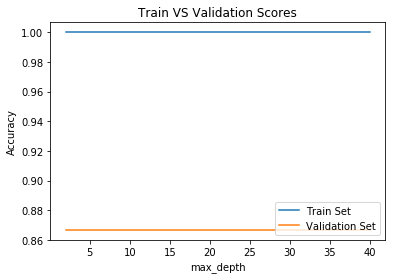

Highest Accuracy (Train): 1.0 (max_depth = 2)
Highest Accuracy (Test): 0.8666666666666667 (max_depth = 2)


In [19]:
max_depths = [int(x) for x in np.linspace(start = 2, stop = 40, num = 10)]
clf_list = []
for depth in max_depths:
    clf = xgb.XGBClassifier(max_depth = depth)
    clf_list.append(clf)

train_vs_test_plot(clf_list, 'max_depth')

Looks like the max depth is consistent for all depths. This is most likelt because XGBoost is creating small trees (stumps).

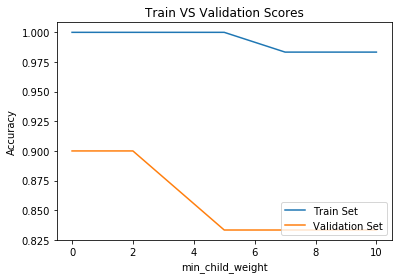

Highest Accuracy (Train): 1.0 (min_child_weight = 0)
Highest Accuracy (Test): 0.9 (min_child_weight = 0)


In [20]:
min_child_weights = [int(x) for x in np.linspace(start = 0, stop = 10, num = 5)]
clf_list = []
for weight in min_child_weights:
    clf = xgb.XGBClassifier(min_child_weight = weight)
    clf_list.append(clf)

train_vs_test_plot(clf_list, 'min_child_weight')

Keeping min_child_weight = 1 produces the best results. As we increase the weights, the accuracy of the validation set begins to decrease.

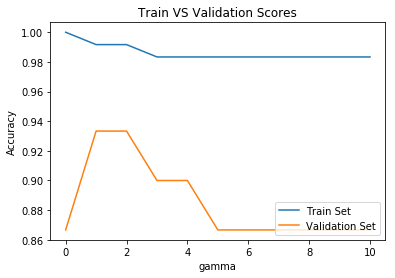

Highest Accuracy (Train): 1.0 (gamma = 0)
Highest Accuracy (Test): 0.9333333333333333 (gamma = 1)


In [21]:
gammas = [int(x) for x in np.linspace(start = 0, stop = 10, num = 10)]
clf_list = []
for gamma in gammas:
    clf = xgb.XGBClassifier(gamma = gamma)
    clf_list.append(clf)

train_vs_test_plot(clf_list, 'gamma')

The best gamma seems to be between 1 and 2. I will choose 1 to keep it simple.

# Grid Search CV

In [22]:
param_grid = {"max_depth": [1,2,10],
              "min_child_weights" : [1,2,5],
              "gamma": [1,2],
              "n_estimators": [50,100,300],
              "learning_rate": [0.5,1,1.5,2]}

In [23]:
model = xgb.XGBClassifier()

In [24]:
gs_cv = GridSearchCV(model, param_grid=param_grid, cv = 3, verbose=10, n_jobs=-1 ).fit(X_train, Y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1778s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0590s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:    4.0s finished


In [25]:
gs_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=1, max_delta_step=0,
       max_depth=2, min_child_weight=1, min_child_weights=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [26]:
best_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=1, max_delta_step=0,
       max_depth=2, min_child_weight=1, min_child_weights=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [27]:
# fitting our model and making predictions on validation set
best_model.fit(X_train, Y_train)
Y_pred = best_model.predict(X_validation)

In [28]:
# check performance using confusion matrix
print(accuracy_score(Y_validation, Y_pred))
print(confusion_matrix(Y_validation, Y_pred))
print(classification_report(Y_validation, Y_pred))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

      micro avg       0.93      0.93      0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



We achieved the same results as our SVM model; however, it might be better to use SVM because we achieved that accuracy with no hyperparameter tuning.

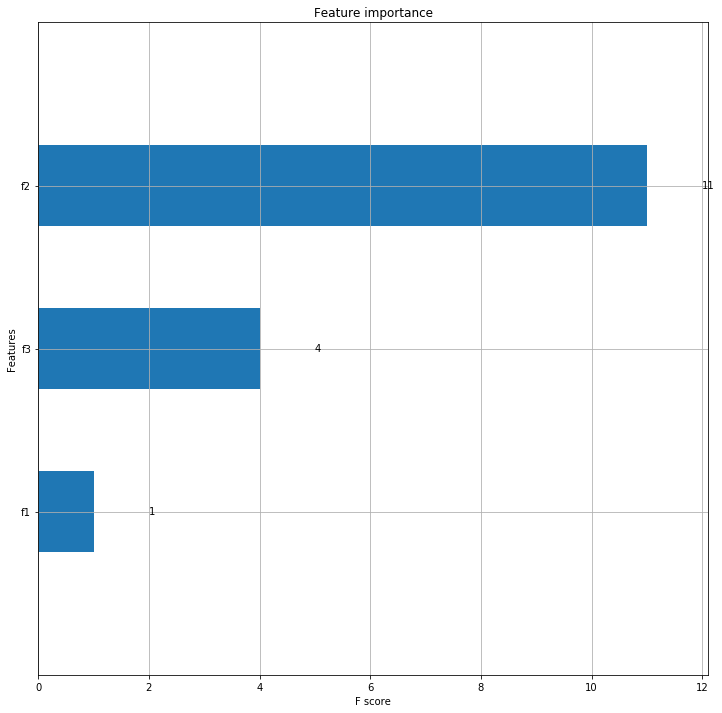

In [38]:
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_importance(best_model, height=0.5, ax=ax)
plt.show()

We see that the plot_importances functions uses the features index instead of name:

f1: sepal-length
f2: sepal-width
f3: petal-length
f4: petal-width
f5: 